#項3 幾何光学

**例題3.1 デカルトの卵形**

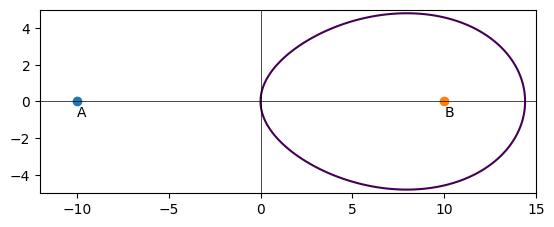

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n1 = 1.0
n2=1.5
a=10.0
b=12.0

delta=0.025
xrange=np.arange(-10, 15, 0.01)
yrange=np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(xrange, yrange)

plt.axis([-12, 15, -5, 5])
plt.gca().set_aspect('equal', adjustable='box')
Z=n1*np.sqrt((X+a)**2+Y**2)+n2*np.sqrt((X-b)**2+Y**2)-(n1*a+n2*b)
plt.contour(X, Y, Z, [0.0])
plt.plot(-10.0, 0.0, 'o')
plt.plot(10.0, 0.0, 'o')
plt.plot([-12.0, 15.0], [0.0, 0.0], 'k-', linewidth=0.5)
plt.plot([0.0, 0.0], [-5.0, 5.0], 'k-', linewidth=0.5)
plt.text(-10.0, -0.8, "A")
plt.text(10.0, -0.8, "B")
plt.savefig("descart_egg", dpi=400)

In [ ]:
from sympy import Matrix, symbols

**例題3.3 レンズの行列**

In [ ]:
p1, p2, n2, T = symbols('p1 p2 n2 T')

RM1 = Matrix([[1, -p1], [0, 1]])
RM2 = Matrix([[1, -p2], [0, 1]])
TM = Matrix([[1, 0], [T, 1]])
SM = RM2 * TM * RM1
print(SM)

Matrix([[-T*p2 + 1, -p1*(-T*p2 + 1) - p2], [T, -T*p1 + 1]])


**例題3.4 結像系行列**

In [ ]:
a, b, c, d, L1, L2 = symbols('a b c d L1 L2')

T1 = Matrix([[1, 0], [-L1, 1]])
SM = Matrix([[b, -a], [-d, c]])
T2= Matrix([[1, 0], [L2, 1]])
L = T2 * SM * T1
print(L)

Matrix([[L1*a + b, -a], [-L1*(-L2*a + c) + L2*b - d, -L2*a + c]])


**例題3.6 球レンズ**

In [ ]:
from sympy import symbols, Matrix, simplify
from sympy.abc import a, b, c, d

r, n, p1, p2, T, f, lH1, lH2 = symbols('r n p1 p2 T f lH1 lH2')

T = 2 * r / n
p1 = (n - 1) / r
p2 = -(1 - n) / r
RM1 = Matrix([[1, -p1], [0, 1]])
RM2 = Matrix([[1, -p2], [0, 1]])
TM = Matrix([[1, 0], [T, 1]])
SM = RM2 * TM * RM1
SM = simplify(SM)
print(SM)

a = -SM[0, 1]
b = SM[0, 0]
c = SM[1, 1]
d = -SM[1, 0]

lH1 = (1 - b) / a
lH2 = (c - 1) / a
lH1 = simplify(lH1)
lH2 = simplify(lH2)

print(lH1, lH2)


Matrix([[(2 - n)/n, 2*(1 - n)/(n*r)], [2*r/n, (2 - n)/n]])
r -r


**例題3.7 組合せレンズ**

In [ ]:
from sympy import symbols, Matrix

a1, b1, c1, d1, t1 = symbols("a1 b1 c1 d1 t1")
a2, b2, c2, d2, t2, t = symbols("a2 b2 c2 d2 t2 t")
S1 = Matrix([[b1, -a1], [-d1, c1]])
T = Matrix([[1, 0], [t, 1]])
S2 = Matrix([[b2, -a2], [-d2, c2]])
S = S2 * T * S1
print(S)

Matrix([[a2*d1 + b1*(-a2*t + b2), -a1*(-a2*t + b2) - a2*c1], [b1*(c2*t - d2) - c2*d1, -a1*(c2*t - d2) + c1*c2]])


**例題3.9 光共振器**

In [ ]:
from sympy import symbols, Matrix

r1, r1, d, g1, g2 = symbols("r1 r2 d g1 g2")

R1 = Matrix([[1, 2*(g1 - 1) / d], [0, 1]])
R2 = Matrix([[1, 2*(g2 - 1) / d], [0, 1]])
D = Matrix([[1, 0], [d, 1]])
S = R1 * D * R2 * D
Seigen = S.eigenvals()
print(Seigen)

{2*g1*g2 - 2*sqrt(g1*g2*(g1*g2 - 1)) - 1: 1, 2*g1*g2 + 2*sqrt(g1*g2*(g1*g2 - 1)) - 1: 1}


Text(0, 0.5, '$\\lambda_1$')

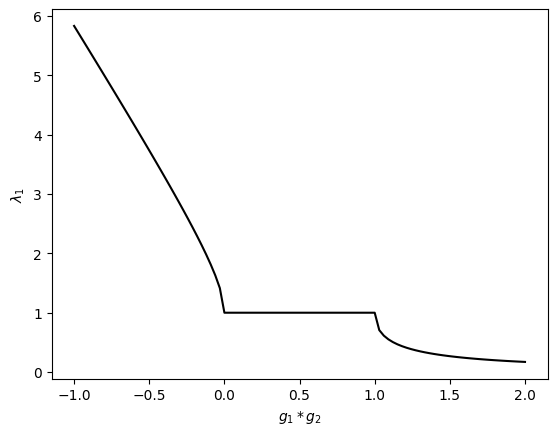

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.linspace(-1, 2, N)
y = np.zeros(N)
for i in range(N):
  if (2 * x[i] - 1)**2 - 1 >= 0:
    y[i] = np.abs(2 * x[i] - 1 - np.sqrt((2 * x[i] - 1)**2 - 1))
  else:
    #書籍:np.complex ⇒ complexに変更
    y[i] = np.abs(2 * x[i] - 1 - complex(0, np.sqrt(1 - (2 * x[i] - 1)**2)))

fig, ax = plt.subplots()
ax.plot(x, y, c="k")
ax.set_xlabel("$g_1 * g_2$")
ax.set_ylabel("$\lambda_1$")

**プログラム3.1**

<ipython-input-10-704e31f5a7ad>:12: RuntimeWarning: invalid value encountered in divide
  s1 = r - r * n0 * np.sin(i0) / (n1 * np.sin(u0 + i1 - i0))


Text(0, 0.5, "s'")

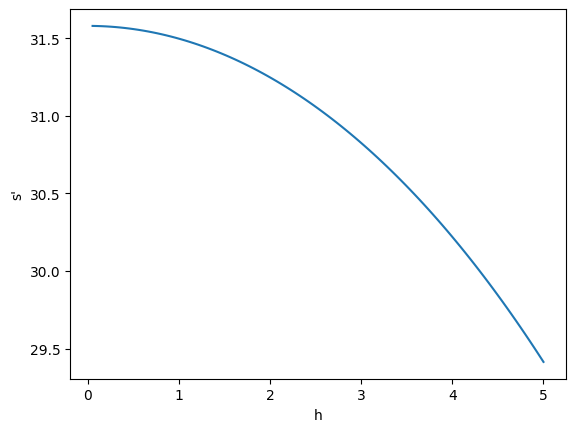

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

h = np.linspace(0, 5, 100)
n0 = 1.0
n1 = 1.5
r = 10
s0 = -400
u0 = np.arctan(h / -s0)
i0 = np.arcsin((-s0 + r) * np.sin(u0) / r)
i1 = np.arcsin(n0 / n1 * np.sin(i0))
s1 = r - r * n0 * np.sin(i0) / (n1 * np.sin(u0 + i1 - i0))


fig, ax = plt.subplots()
ax.plot(h, s1)
ax.set_xlabel("h")
ax.set_ylabel("s'")

# 項4 波動としての光

**例題4.1のプログラム**

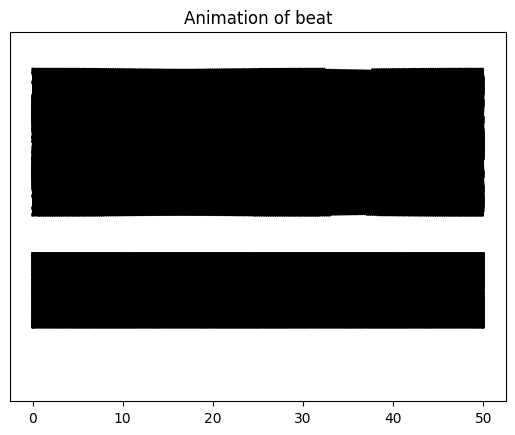

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

def wave(z, t, k, omega):
  return np.cos(k * z - omega * t)

fig, ax = plt.subplots()
anim = []

k1 = 5
k2 = 5.5
omega1 = 10
omega2 = 11

z = np.linspace(0, 50, 500)
for i in range(100):
  time = i / 10.0
  u = wave(z, time, k1, omega1) + wave(z, time, k2, omega2) + 2
  image1 = ax.plot(z, u, color="black")
  u = wave(z, time, k1, omega1) - 2
  image2 = ax.plot(z, u, color="black")
  plt.title("Animation of beat")
  plt.ylim(-5, 5)
  plt.yticks([])
  anim.append(image1 + image2)

anim = animation.ArtistAnimation(fig, anim, interval=100)
plt.show()

#項5 波動光学

**例題5.1 のプログラム**

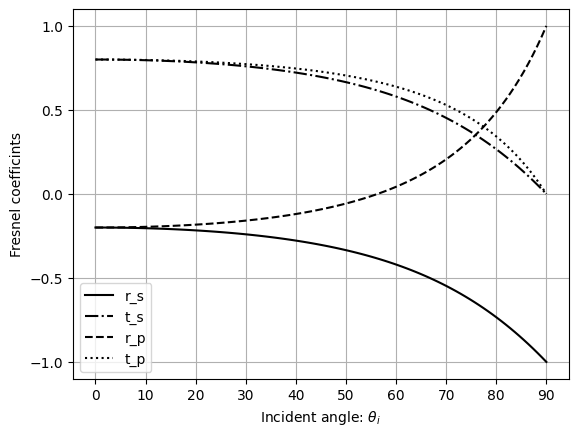

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rs(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (ni * np.cos(theta) - nt * costheta) / (ni * np.cos(theta) + nt * costheta)

def ts(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (2 * ni * np.cos(theta)) / (ni * np.cos(theta) + nt * costheta)

def rp(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (ni * costheta - nt * np.cos(theta)) / (ni * costheta + nt * np.cos(theta))

def tp(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (2 * ni * np.cos(theta)) / (ni * costheta + nt * np.cos(theta))

ni = 1
nt = 1.5

theta = np.linspace(0, np.pi / 2, 101)

fig, ax = plt.subplots()

ax.plot(np.degrees(theta), rs(theta, ni, nt), "-k", label="r_s")
ax.plot(np.degrees(theta), ts(theta, ni, nt), "-.k", label="t_s")
ax.plot(np.degrees(theta), rp(theta, ni, nt), "--k", label="r_p")
ax.plot(np.degrees(theta), tp(theta, ni, nt), ":k", label="t_p")
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_xlabel("Incident angle: $\u03b8_i$")
ax.set_ylabel("Fresnel coefficints")
ax.grid()
ax.legend(loc="lower left")
fig.savefig("fresnel_coeffs.png")

**例題5.2 のプログラム**

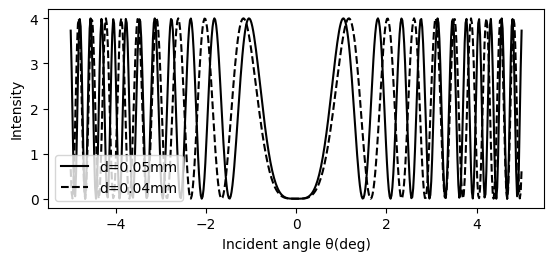

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fringe(theta, w_length, n, d):
  return 4 * np.sin((2 * np.pi * n * d * np.cos(theta)) / w_length) ** 2

w_length = 0.5e-6
n = 1.5
d1 = 0.5e-3
d2 = 0.4e-3

angle = np.linspace(-5, 5, 500)
theta = np.radians(angle)

fig, ax = plt.subplots()
ax.plot(angle, fringe(theta, w_length, n, d1), "-k", label="d=0.05mm")
ax.plot(angle, fringe(theta, w_length, n, d2), "--k", label="d=0.04mm")
ax.set_aspect(1)
ax.set_xlabel("Incident angle \u03b8(deg)")
ax.set_ylabel("Intensity")
ax.legend(loc="lower left")
fig.savefig("fringe_haidinger.png")

**例題5.3 多光束干渉**

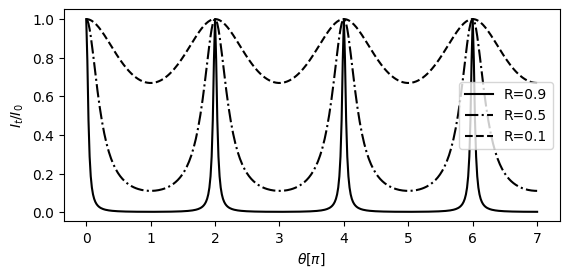

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def T(delta, R):
  return (1-R)**2 / ((1-R)**2 + 4 * R * np.sin(delta * np.pi / 2)**2)

delta = np.linspace(0, 7, 400)

fig, ax = plt.subplots()
ax.plot(delta, T(delta, 0.9), "-k", label="R=0.9")
ax.plot(delta, T(delta, 0.5), "-.k", label="R=0.5")
ax.plot(delta, T(delta, 0.1), "--k", label="R=0.1")
ax.legend()
ax.set_aspect(3)
ax.set_xlabel(r"$\theta [\pi]$")
ax.set_ylabel(r"$I_t/I_0$")
fig.savefig("multi_beam.png")

**例題5.4 二層反射防止膜**

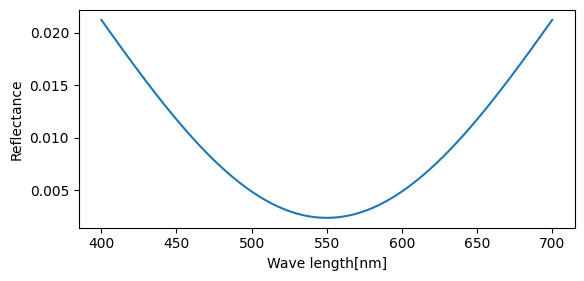

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def M0(wlen, Y):
  wlen0 = 550
  delta = np.pi / 2 * wlen / wlen0
  return np.array([[np.cos(delta), 1J * np.sin(delta)/Y], [1j * Y * np.sin(delta), np.cos(delta)]])

N = 200
wlen = np.linspace(400, 700, N)
n0=1; n1=1.38; n2=1.62; ng=1.52

Y0 = n0
Y1 = n1
Y2 = n2
Yg = ng

R = []

for w in wlen:
  M = M0(w, Y1) @ M0(w, Y2)
  m11 = M[0, 0]
  m12 = M[0, 1]
  m21 = M[1, 0]
  m22 = M[1, 1]
  r = (Y0 * (m11 + Yg * m12) - (m21 + Yg * m22)) / (Y0 * (m11 + Yg * m12) + (m21 + Yg * m22))
  r2 = np.abs(r)**2
  R.append(r2)

fig, ax = plt.subplots()
ax.plot(wlen, R)
ax.set_aspect(700/0.1)
ax.set_xlabel("Wave length[nm]")
ax.set_ylabel("Reflectance")
fig.savefig("two_layer.png")

**例題5.5 多層膜反射**

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 200)

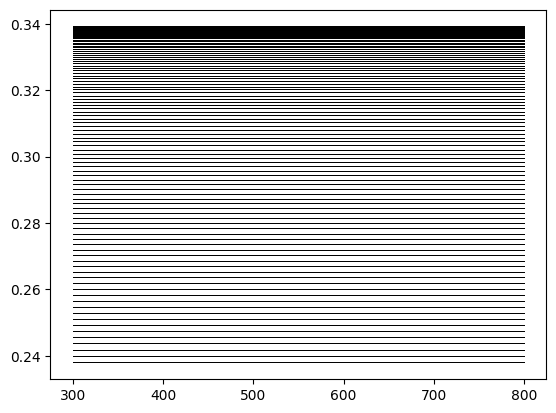

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 特性行列の定義
def M(delta, Y):
  wlen0 = 550
  delta = np.pi / 2 * wlen / wlen0
  return np.array([[np.cos(delta), 1J * np.sin(delta)/Y], [1j * Y * np.sin(delta), np.cos(delta)]])


n0=1; nH=2.40; nL=1.38; ns=1.52
YH=nH; YL=nL; Y0=n0; Ys=ns

wlen0 = 550
wlen = np.linspace(300, 800, 200)

fig, ax = plt.subplots()

for N in range(5):
  R = []
  for w in wlen:
    delta = np.pi / 2 * w / wlen0
    if N == 0:
      MM = M(delta, YH)
    if N == 1:
      MM = M(delta, YH) @ M(delta, YL) @ M(delta, YH)
    if N == 2:
      MM = M(delta, YH) @ M(delta, YL) @ M(delta, YH) @ M(delta, YL) @ M(delta, YH)
    if N == 3:
      MM = M(delta, YH) @ M(delta, YL) @ M(delta, YH) @ M(delta, YL) @ M(delta, YH) @ M(delta, YL) @ M(delta, YH)
    if N == 4:
      MM = M(delta, YH) @ M(delta, YL) @ M(delta, YH) @ M(delta, YL) @ M(delta, YH) @ M(delta, YL) @ M(delta, YH) @ M(delta, YL) @ M(delta, YH)

    m11 = MM[0, 0]
    m12 = MM[0, 1]
    m21 = MM[1, 0]
    m22 = MM[1, 1]
    r = (Y0 * (m11 + Ys * m12) - (m21 + Ys * m22)) / (Y0 * (m11 + Ys * m12) + (m21 + Ys * m22))
    r2 = np.abs(r) ** 2
    R.append(r2)

  ax.plot(wlen, R, color="k", linewidth = (N+4)/6, label="$N$ = {}".format(N))

ax.legend()
ax.set_xlabel("Wave length[nm]")
ax.set_ylabel("Reflectance")
fig.savefig("multi_layer.png")

**例題5.6 傾斜因子**

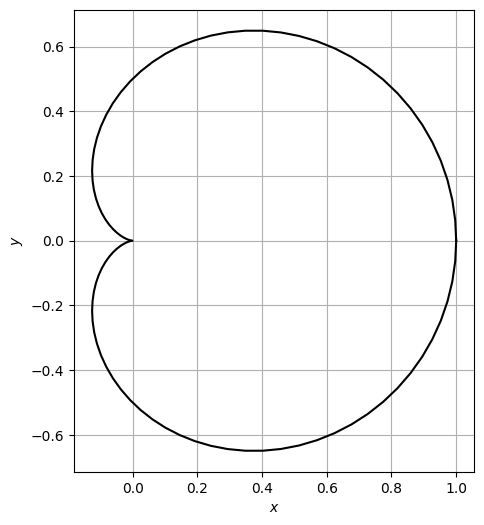

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 100)
x = (1 + np.cos(theta)) / 2 * np.cos(theta)
y = (1 + np.cos(theta)) / 2 * np.sin(theta)

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x, y, "-k")
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
fig.savefig("inc_factor.png")

**例題5.7 コルニューの螺旋**

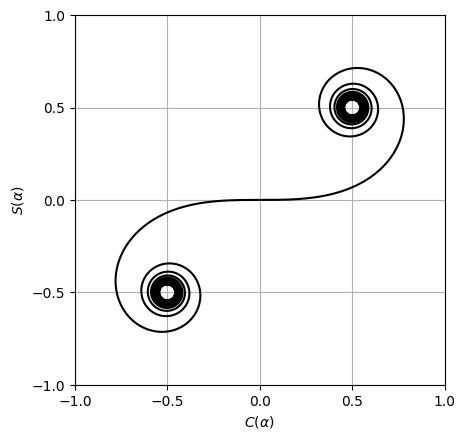

In [ ]:
import numpy as np
from scipy.special import fresnel
import matplotlib.pyplot as plt


t = np.linspace(-7.5, 7.5, 1000)
fs = fresnel(t)[0]
fc = fresnel(t)[1]
fig, ax = plt.subplots()
ax.plot(fc, fs, c="k")
ax.set(xlim=(-1, 1), ylim=(-1, 1), aspect="equal", xlabel="$C(\u03b1)$", ylabel="$S(\u03b1)$")
ax.set_xticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.grid()
fig.savefig("cornu_spiral.png")

**例題5.8 ナイフエッジのフレネル回析**

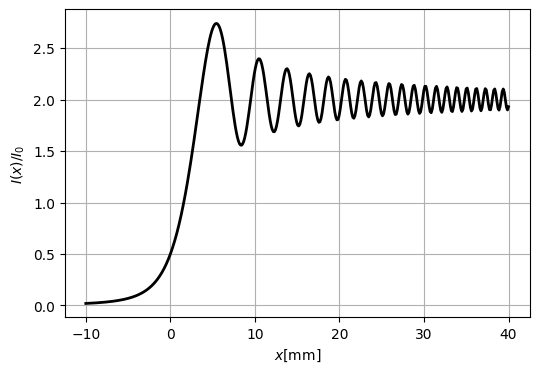

In [ ]:
import numpy as np
from scipy.special import fresnel
import matplotlib.pyplot as plt

wave_l = 0.63**(-3)
r0 = 10

x = np.linspace(-10, 40, 400)
xx = x * np.sqrt(2/(wave_l * r0))
fs, fc = fresnel(xx)
I = (1/2 + fc)**2 + (1/2 + fs)**2
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, I, c="k", linewidth=2)
ax.set(xlabel="$x$[mm]", ylabel="$I(x)/I_0$")
ax.grid()
fig.savefig("fresnel_edge.png")

**例題5.9 円形開口のフレネル回析**

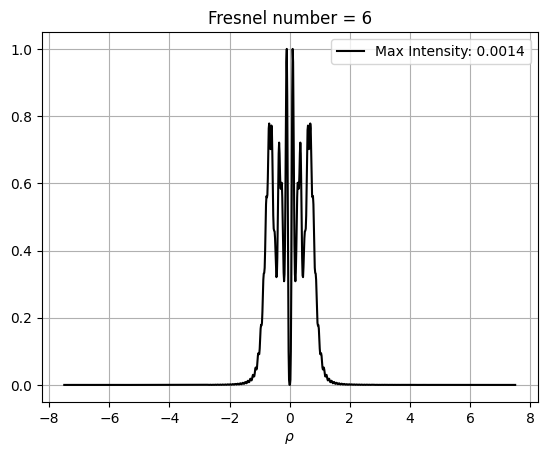

In [ ]:
from scipy.integrate import quad
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np


def funcc(r, a, b):
  return np.cos(a * r**2) * jv(0, b * r) * r

def funcs(r, a, b):
  return np.sin(a * r**2) * jv(0, b * r) * r

wave_l = 0.632 * 10**(-3)
R = 1

#Nf = 3
Nf = 6
r0 = R**2/(wave_l * Nf)
Nrho = 1000
rho = np.linspace(-7.5, 7.5, Nrho)
valuec = np.arange(0)
values = np.arange(0)

a = np.pi * R**2 / (wave_l * r0)
for i in range(Nrho):
  b = 2 * np.pi * R * rho[i] / (wave_l * r0)
  vc, error = quad(funcc, 0, 1, args=(a, b))
  vs, error = quad(funcs, 0, 1, args=(a, b))
  valuec = np.append(valuec, vc)
  values = np.append(values, vs)

I = (valuec)**2 + (values)**2
Imax = np.max(I)
fig, ax = plt.subplots()
ax.plot(rho, I/Imax, "-k", linewidth=1.5, label = "Max Intensity: {:#.2g}".format(Imax))
ax.legend(loc="upper right")
ax.grid()
ax.set_xlabel(r"$\rho$")
ax.set_title("Fresnel number = {:#}".format(Nf))
fig.savefig("fresnel_circ.png")

**例題5.10 複矩形開口のフラウンホーファー回折**

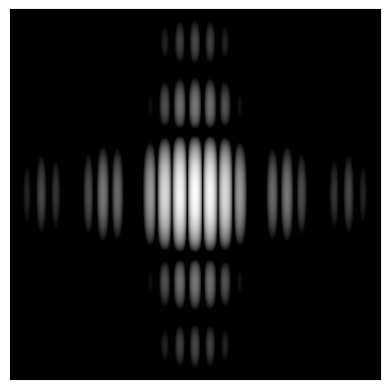

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=401

x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y)
Z = np.sinc(X)**2 * np.sinc(Y)**2 * np.cos(4 * np.pi * X)**2
Zlog = np.log10(Z)

mask = Zlog > -2.5
Zlog[mask == False] = -2.5

fig, ax = plt.subplots()
ax.set(xticks=[], yticks=[])
ax.imshow(Zlog, cmap="gray")

fig.savefig("fraun_2rect.png")

**例題5.11 回折格子のフラウンホーファー回折**

<ipython-input-14-f0c3cc803d47>:7: RuntimeWarning: invalid value encountered in divide
  C = A / B


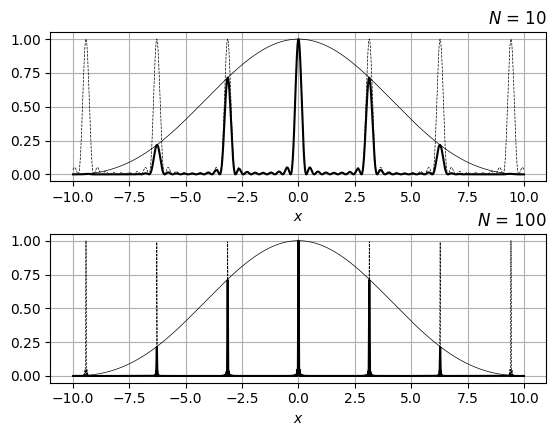

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, d, N):
  A = np.sin(N * d * x)**2 / N**2
  B = np.sin(d * x)**2
  C = A / B
  C = np.divide(A, B, out=np.ones_like(B), where=B!=0)
  return C

nx = 4001
w = 0.1
d = 1

x = np.linspace(-10, 10, nx)

fig, ax = plt.subplots(2)

N = 10
ax[0].plot(x, f(x, d, N-1), "--k", linewidth = 0.5)
ax[0].plot(x, np.sinc(w * x)**2, "-k", linewidth = 0.5)
ax[0].plot(x, f(x, d, N-1) * np.sinc(w * x)**2, "-k")
ax[0].grid()
ax[0].set_title("$N$ = 10", loc="right")
ax[0].set_xlabel("$x$")
ax[0].set_aspect(6)

N = 100
ax[1].plot(x, f(x, d, N-1), "--k", linewidth = 0.5)
ax[1].plot(x, np.sinc(w * x)**2, "-k", linewidth = 0.5)
ax[1].plot(x, f(x, d, N-1) * np.sinc(w * x)**2, "-k")
ax[1].grid()
ax[1].set_title("$N$ = 100", loc="right")
ax[1].set_xlabel("$x$")
ax[1].set_aspect(6)


fig.savefig("grating.png")

**例題6.3.1 1次元フーリエ変換**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


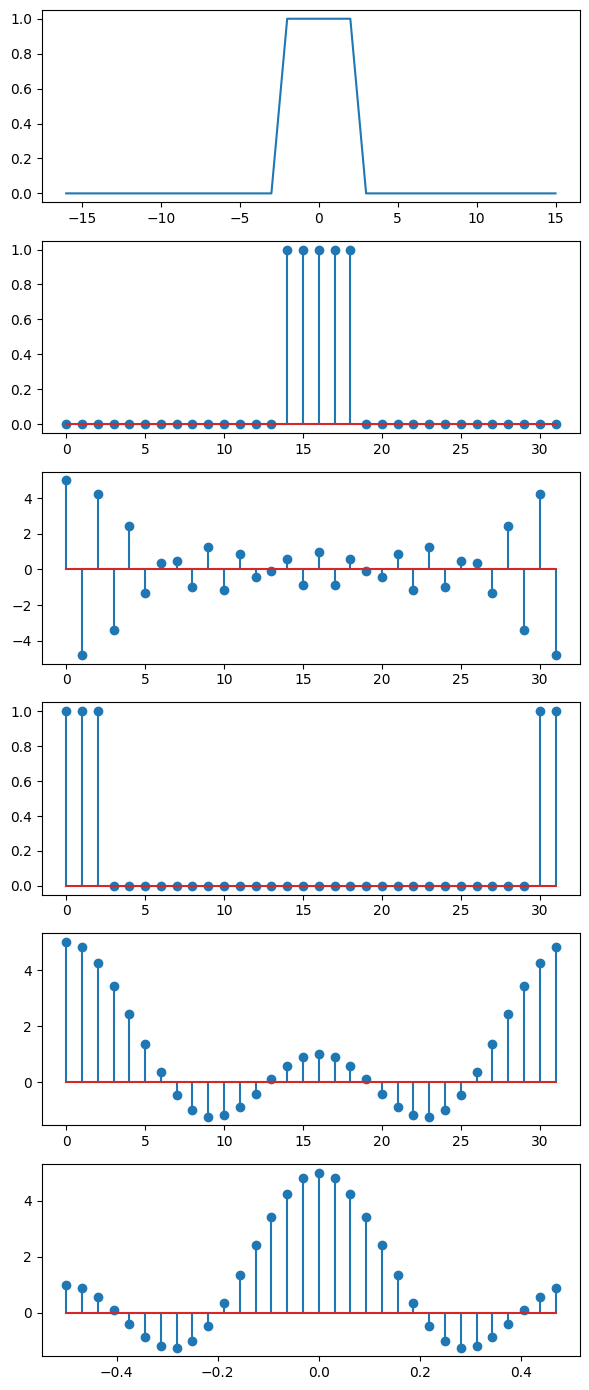

In [ ]:
import numpy as np
from scipy import fftpack as ffp
import matplotlib.pyplot as plt

def rect(x):
  return np.where(np.abs(x) <= 0.5, 1, 0)

N = 32
N2 = N / 2
w = 5
x = np.linspace(-N2, N2 - 1, N)
y = rect(x/w)
yshift = ffp.fftshift(y)

f = ffp.fft(y)
freqs = ffp.fftfreq(N)
fshift = ffp.fftshift(f)

fig, ax = plt.subplots(6, figsize=(6, 14), tight_layout=True)
ax[0].plot(x, y)
ax[1].stem(y)
ax[2].stem(np.real(f))
ax[3].stem(yshift)
ax[4].stem(ffp.fft(yshift))
ax[5].stem(freqs, ffp.fft(yshift))

fig.savefig("fft_rect.png")

**例題6.3.2 画像のフーリエ**

In [ ]:
from PIL import Image
import numpy as np
from scipy import fftpack as ffp
import matplotlib.pyplot as plt

im_gray = Image.open("falcon512.png").convert("L")
im_gray_512 = np.array(im_gray.crop((180, 190, 180+512, 190+512)))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im_gray_512, cmap="gray")
f_im = ffp.fft2(im_gray_512)
shift_f_im = ffp.fftshift(f_im)
ax[1].imshow(np.log10(np.abs(shift_f_im)), cmap="gray")

fig.savefig("falcon512_spectrum.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/falcon512.png'

**例題6.1 矩形アパーチャーのフレネル回析**

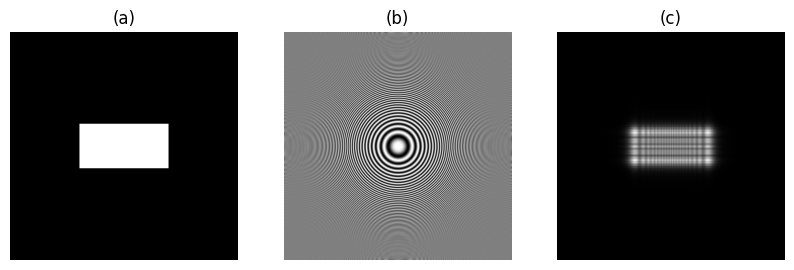

In [ ]:
import numpy as np
from scipy import fftpack as ffp
import matplotlib.pyplot as plt

N = 512
delta = 0.1
wavelen = 0.6328e-3
distance = 8.0e3
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

aperture = np.zeros((N, N))
aperture[N//2 - 50:N//2 + 50, N//2 - 100: N//2 + 100] = 1.0
ax[0].imshow(aperture, cmap="gray")
ax[0].axis("off")
ax[0].set_title("(a)")
xi_x = np.linspace(-N/2, N/2 - 1, N) * delta
xi_y = np.linspace(-N/2, N/2 - 1, N) * delta

Xi_x, Xi_y = np.meshgrid(xi_x, xi_y)

phase_factor = np.exp(-1j * np.pi / (wavelen * distance) * (Xi_x ** 2 + Xi_y ** 2))

ax[1].imshow(np.real(phase_factor), cmap="gray")
ax[1].axis("off")
ax[1].set_title("(b)")

FT_core = ffp.fftshift(ffp.fft2(aperture * phase_factor))

ax[2].imshow(np.abs(FT_core)**2, cmap="gray")
ax[2].axis("off")
ax[2].set_title("(c)")

fig.savefig("fresnel_10")

**例題6.2 角スペクトル法によるスリットの回析計算**

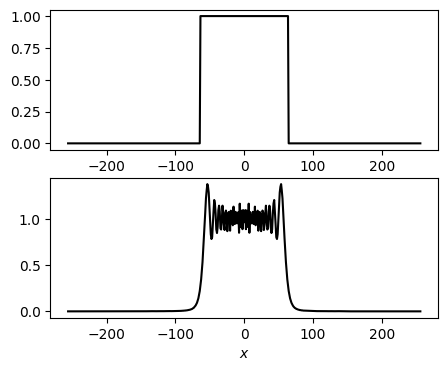

In [ ]:
import numpy as np
from scipy import fftpack as ffp
import matplotlib.pyplot as plt

def rect(x):
  return np.where(np.abs(x) <= 0.5, 1, 0)

fig, ax = plt.subplots(2, figsize=(5, 4))

N = 512
wavelen = 0.6328*10**(-3)
z = 0.25
dx = 1.0e-3

x = np.linspace(-N/2, N/2, N)
fx = rect((x)/128)
ax[0].plot(x, fx, "-k")
ax[0].set_xlabel("$x$")

nux = ffp.fftfreq(N, dx)
nu_sq = 1 / wavelen**2 - nux**2

mask = nu_sq > 0
phase_func = np.zeros(len(nux), dtype = np.complex_)
phase_func[mask] = np.exp(1j * 2 * np.pi * np.sqrt(nu_sq[mask]) * z)

diffraction = ffp.ifft(phase_func * ffp.fft(fx))

ax[1].plot(x, np.abs(diffraction)**2, "-k")
ax[1].set_xlabel("$x$")

fig.savefig("ASM_slit.png")

**例題6.3 角スペクトル法による複開口の回析計算**

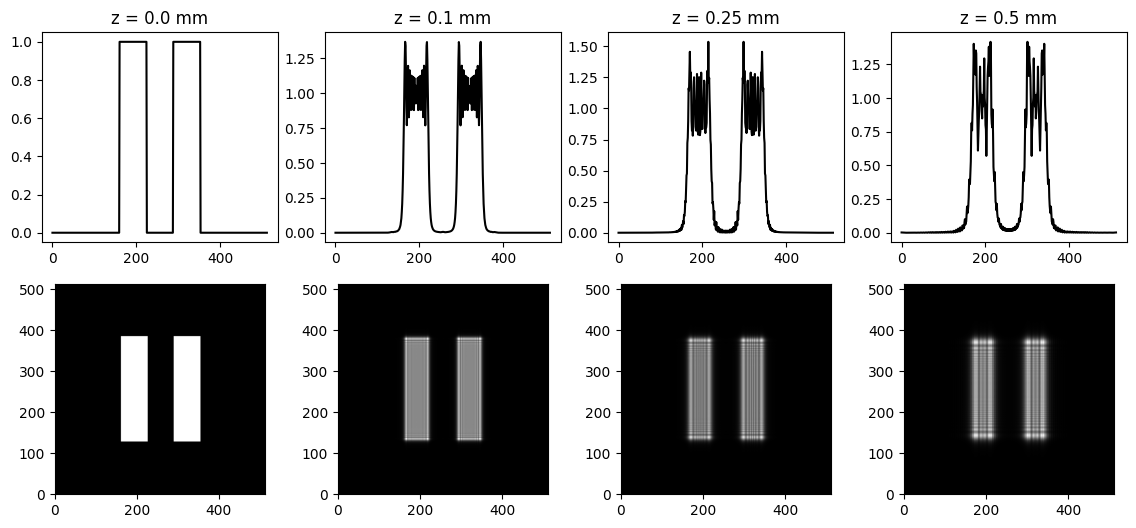

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rect2d(x, y):
  return np.where((np.abs(x) <= 0.5) & (np.abs(y) <= 0.5), 1, 0)

N = 512
N2 = N/2
wavelen = 0.6328*10**(-3)
dx, dy = 1.0e-3, 1.0e-3

x = np.arange(N)
y = np.arange(N)
X, Y = np.meshgrid(x, y)
Z = rect2d((X - N2 - 64)/64, (Y - N2)/256) + rect2d((X-N2+64)/64, (Y-N2)/256)

fig, ax = plt.subplots(2, 4, figsize=(14, 6))
ax[0, 0].plot(Z[256, :], "-k")
ax[0, 0].set_title("z = 0.0 mm")
ax[1, 0].imshow(Z, cmap="gray", origin = "lower")

nux = np.fft.fftfreq(N, dx)
nuy = np.fft.fftfreq(N, dy)
Nux, Nuy = np.meshgrid(nux, nuy)
nu_sq = 1 / wavelen**2 - (Nux**2 + Nuy**2)
mask = nu_sq > 0
weight = np.zeros((N, N), dtype = np.complex_)

distance = [0.1, 0.25, 0.5]
for i in range(3):
  z = distance[i]
  weight[mask] = np.exp(1j * 2 * np.pi * np.sqrt(nu_sq[mask]) * z)

  diffraction = np.fft.ifft2(weight * np.fft.fft2(Z))

  ax[0, i+1].plot(np.abs(diffraction[256, :])**2, "-k")
  ax[0, i+1].set_title("z = {} mm".format(z))
  ax[1, i+1].imshow(np.abs(diffraction)**2, cmap="gray", origin = "lower")


fig.savefig("AS_2D.png")

**例題6.4 帯域制限されたコヒーレント結像**

In [ ]:
from PIL import Image
import numpy as np
from scipy import fftpack as ffp
import matplotlib.pyplot as plt


im_gray = Image.open("USAF-1951.png").convert("L")
im_array = np.array(im_gray)
im_512 = np.zeros((512, 512))
im_512[75:438, 5:505] = im_array

fig, ax = plt.subplots(2, 4, figsize=(14, 6))

N = 512
dx = 0.5e-6; dy = 0.5e-6
w_length = 0.5e-6

f_number = [2.0, 5.0, 10.0, 20.0]

spec = ffp.fft2(im_512)
nux = ffp.fftfreq(N, dx)
nuy = ffp.fftfreq(N, dy)

Nux, Nuy = np.meshgrid(nux, nuy)
rho = np.sqrt(Nux**2 + Nuy**2)

for i in range(4):
  b_lim = 1 / (w_length * f_number[i])
  mask = rho < b_lim

  OTF = np.zeros((N, N))
  OTF[mask] = 1.0
  spec2 = spec * OTF
  image = ffp.ifft2(spec2)

  spec_power = np.abs(spec2)**2
  spec_p_log = np.log10(spec_power)
  spec_p_max = spec_p_log.max()
  spec_p_log = spec_p_log / spec_p_max

  ax[0, i].imshow(np.abs(ffp.fftshift(spec_p_log * OTF)), cmap="gray")
  ax[0, i].set_title("f/ {}".format(f_number[i]))
  ax[0, i].axis("off")
  ax[1, i].imshow(np.abs(image)**2, cmap="gray")
  ax[1, i].axis("off")

fig.savefig("OTF_coherent.png")

ValueError: could not broadcast input array from shape (512,512) into shape (363,500)

**6.9.1 計算機ホログラム プログラム6.3**

In [ ]:
from PIL import Image
import numpy as np
from scipy import fftpack as ffp
import matplotlib.pyplot as plt

N = 512

amp_ref = 500.0

dog_mono = Image.open("dog_mono.png").convert("L")
dog_mono = dog_mono.resize((N//2, N//2))
dog = np.array(dog_mono)
rand_phase = np.exp(np.pi * 2.0 * np.random.rand(N//2, N//2) * 1j)

dog_512 = np.zeros((N, N), dtype="complex64")
dog_512[:256, :256] = dog * rand_phase

fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].imshow(np.abs(dog_512), cmap="gray")
ax[0].axis("off")
ax[0].set_title("Object")

reference = np.zeros((N, N), dtype="complex64")
reference[N//2, N//2] = amp_ref

diff_dog_512 = ffp.fftshift(ffp.fft2(dog_512))
I_dog = np.abs(diff_dog_512)**2

diff_ref = ffp.fftshift(ffp.fft2(reference))
I_ref = np.abs(diff_ref)**2

diff_d_r = diff_dog_512 + diff_ref
I_d_r = np.abs(diff_d_r)**2

hologram = I_d_r
ax[1].imshow(hologram, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Hologram")

reconst = ffp.fftshift(ffp.ifft2(ffp.fftshift(hologram)))
reconst[256, 256] = 0j
ax[2].imshow(np.abs(reconst), cmap="gray")
ax[2].axis("off")
ax[2].set_title("Reconstructed image")

reconst = ffp.fftshift(ffp.ifft2(ffp.fftshift(hologram - I_dog)))
ax[3].imshow(np.abs(reconst), cmap="gray")
ax[3].axis("off")
ax[3].set_title("Reconst. image filtered")

fig.savefig("FT_CGH.png")

**例題7.1 直線偏光子の回転**

In [ ]:
from sympy import Matrix, sin, cos
from sympy.abc import theta

J_rot = Matrix([[cos(theta), sin(theta)], [-sin(theta), cos(theta)]])

J_LH = Matrix([[1,  0], [0, 0]])
J_LV = Matrix([[0, -1], [0, 1]])

A = J_rot.subs(theta, -theta) * J_LH * J_rot
B = J_rot.subs(theta, -theta) * J_LV * J_rot

print(A)
print(B)

Matrix([[cos(theta)**2, sin(theta)*cos(theta)], [sin(theta)*cos(theta), sin(theta)**2]])
Matrix([[-(-sin(theta) - cos(theta))*sin(theta), (-sin(theta) - cos(theta))*cos(theta)], [-(-sin(theta) + cos(theta))*sin(theta), (-sin(theta) + cos(theta))*cos(theta)]])


**例題7.4 直線偏光子の回転**

In [ ]:
from sympy import Matrix, sin, cos, simplify, Rational
from sympy.abc import theta

M_rot = Matrix([[1, 0, 0, 0], [0, cos(2 * theta), sin(2 * theta), 0], [0, -sin(2 * theta), cos(2 * theta), 0], [0, 0, 0, 1]])

M_LH = Rational(1, 2) * Matrix([[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

A = M_rot.subs(theta, -theta) * M_LH * M_rot

print(A)

Matrix([[1/2, cos(2*theta)/2, sin(2*theta)/2, 0], [cos(2*theta)/2, cos(2*theta)**2/2, sin(2*theta)*cos(2*theta)/2, 0], [sin(2*theta)/2, sin(2*theta)*cos(2*theta)/2, sin(2*theta)**2/2, 0], [0, 0, 0, 0]])


**例題7.5 マリュースの法則**

In [ ]:
from sympy import Matrix, sin, cos, simplify, Rational
from sympy.abc import theta

M = Matrix([[1/2, cos(2*theta)/2, sin(2*theta)/2, 0],
 [cos(2*theta)/2, cos(2*theta)**2/2, sin(2*theta)*cos(2*theta)/2, 0],
 [sin(2*theta)/2, sin(2*theta)*cos(2*theta)/2, sin(2*theta)**2/2, 0],
  [0, 0, 0, 0]])

S_LH = Matrix([[1], [1], [0], [0]])

SS = M * S_LH

print(simplify(SS))

Matrix([[1.0*cos(theta)**2], [cos(theta)**2*cos(2*theta)], [2*sin(theta)*cos(theta)**3], [0]])


**例題7.6 波長版の回転**

In [ ]:
from sympy import Matrix, sin, cos, simplify, Rational
from sympy.abc import theta, phi

M_rot = Matrix([[1, 0, 0, 0],
 [0, cos(2*theta), sin(2*theta), 0],
  [0, -sin(2*theta), cos(2*theta), 0],
   [0, 0, 0, 1]])

M_WP = Matrix([[1, 0, 0, 0],
 [0, 1, 0, 0],
  [0, 0, cos(phi), sin(phi)],
   [0, 0, -sin(phi), cos(phi)]])

A = M_rot.subs(theta, -theta) * M_WP * M_rot

print(simplify(A))

Matrix([[1, 0, 0, 0], [0, sin(2*theta)**2*cos(phi) + cos(2*theta)**2, (1 - cos(phi))*sin(2*theta)*cos(2*theta), -sin(phi)*sin(2*theta)], [0, (1 - cos(phi))*sin(2*theta)*cos(2*theta), sin(2*theta)**2 + cos(phi)*cos(2*theta)**2, sin(phi)*cos(2*theta)], [0, sin(phi)*sin(2*theta), -sin(phi)*cos(2*theta), cos(phi)]])
